Dataset berhasil dimuat.

--- Mencari Fitur Optimal ---
Urutan fitur berdasarkan kekuatan korelasi:
meanfun     0.833921
IQR         0.618916
Q25         0.511455
sp.ent      0.490552
sd          0.479539
sfm         0.357499
centroid    0.337415
meanfreq    0.337415
median      0.283919
maxdom      0.195657
mindom      0.194974
dfrange     0.192213
meandom     0.191067
mode        0.171775
maxfun      0.166461
minfun      0.136692
kurt        0.087195
Q75         0.066906
skew        0.036627
modindx     0.030801
Name: label, dtype: float64

Fitur terbaik ditemukan pada jumlah: 6 fitur
Akurasi pada tahap ini: 0.9811
Daftar Fitur Optimal: ['meanfun', 'IQR', 'Q25', 'sp.ent', 'sd', 'sfm']

--- Mencari Nilai k Terbaik (Berdasarkan Fitur Optimal) ---
Nilai k terbaik: 8
Akurasi tertinggi: 0.9832


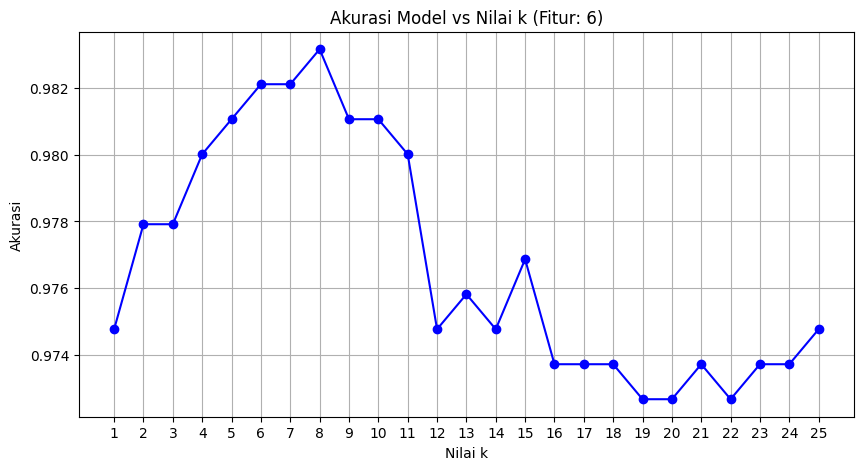

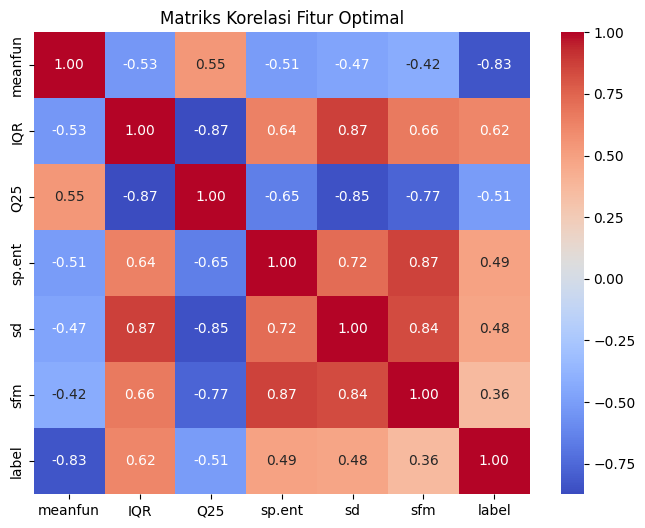

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# ==========================================
# 1. LOAD DATA & PREPROCESSING
# ==========================================

# Membaca dataset
# Pastikan file voice.csv sudah diupload ke sesi Colab
try:
    df = pd.read_csv('/content/drive/MyDrive/ML_Dataset/voice.csv', encoding='latin-1')
    print("Dataset berhasil dimuat.")
except FileNotFoundError:
    print("Error: File voice.csv tidak ditemukan. Mohon upload file terlebih dahulu.")

# Encode label (male/female) menjadi angka (1/0)
le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])

# ==========================================
# 2. PERCOBAAN MENCARI FITUR OPTIMAL
# ==========================================
print("\n--- Mencari Fitur Optimal ---")

# Menghitung korelasi absolut terhadap target 'label'
correlations = df.corr()['label'].drop('label').abs().sort_values(ascending=False)
sorted_features = correlations.index.tolist()

print("Urutan fitur berdasarkan kekuatan korelasi:")
print(correlations)

results_features = []
scaler = StandardScaler()
k_fixed = 5  # Menggunakan k standar untuk seleksi fitur

# Iterasi menambahkan fitur satu per satu dari yang korelasinya paling tinggi
for n in range(1, len(sorted_features) + 1):
    selected_feats = sorted_features[:n]
    X = df[selected_feats]
    y = df['label']

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Scaling (Penting untuk kNN)
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train kNN
    knn = KNeighborsClassifier(n_neighbors=k_fixed)
    knn.fit(X_train_scaled, y_train)

    # Evaluasi
    acc = knn.score(X_test_scaled, y_test)
    results_features.append({'n_features': n, 'accuracy': acc, 'features': selected_feats})

# Mencari jumlah fitur dengan akurasi tertinggi
results_df = pd.DataFrame(results_features)
best_result = results_df.loc[results_df['accuracy'].idxmax()]
optimal_features = best_result['features']

print(f"\nFitur terbaik ditemukan pada jumlah: {best_result['n_features']} fitur")
print(f"Akurasi pada tahap ini: {best_result['accuracy']:.4f}")
print(f"Daftar Fitur Optimal: {optimal_features}")

# ==========================================
# 3. PERCOBAAN MENCARI NILAI K TERBAIK
# ==========================================
print("\n--- Mencari Nilai k Terbaik (Berdasarkan Fitur Optimal) ---")

# Menggunakan hanya fitur optimal yang ditemukan sebelumnya
X_final = df[optimal_features]
y_final = df['label']

# Split data ulang
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.3, random_state=42)

# Scaling ulang
scaler_final = StandardScaler()
X_train_scaled = scaler_final.fit_transform(X_train)
X_test_scaled = scaler_final.transform(X_test)

k_values = range(1, 26)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    acc = knn.score(X_test_scaled, y_test)
    accuracies.append(acc)

# Mencari k dengan akurasi maksimum
best_acc = max(accuracies)
best_k = k_values[accuracies.index(best_acc)]

print(f"Nilai k terbaik: {best_k}")
print(f"Akurasi tertinggi: {best_acc:.4f}")

# ==========================================
# 4. VISUALISASI
# ==========================================

# Grafik 1: Akurasi vs Nilai k
plt.figure(figsize=(10, 5))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='blue')
plt.title(f'Akurasi Model vs Nilai k (Fitur: {len(optimal_features)})')
plt.xlabel('Nilai k')
plt.ylabel('Akurasi')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Grafik 2: Matriks Korelasi Fitur Optimal
plt.figure(figsize=(8, 6))
# Mengambil subset data fitur optimal + label untuk heatmap
heatmap_data = df[optimal_features + ['label']]
sns.heatmap(heatmap_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriks Korelasi Fitur Optimal')
plt.show()

## Kesimpulan
Nilai k terbaik: 8 (Akurasi: 98.32%)

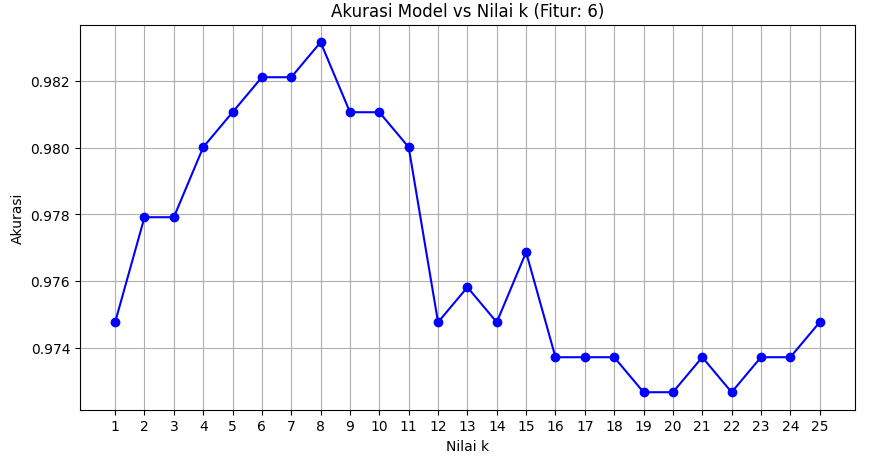